In [18]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [19]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

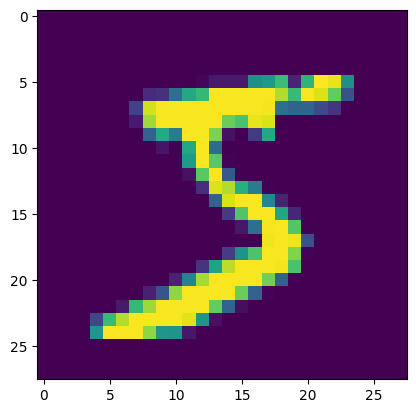

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [34]:
history= model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9753 - val_loss: 0.1470
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9762 - val_loss: 0.1526
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9760 - val_loss: 0.1522
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9721 - val_loss: 0.1766
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9973 - loss: 0.0084 - val_accuracy: 0.9782 - val_loss: 0.1384
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9711 - val_loss: 0.1796
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 0.9769 - val_loss: 0.1603
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9977 - loss: 0.0066 - 

In [27]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
y_prob

array([[3.6532413e-10, 1.6482037e-10, 2.4855480e-09, ..., 1.0000000e+00,
        3.9598836e-12, 1.9704141e-11],
       [9.8012214e-26, 1.0083326e-09, 1.0000000e+00, ..., 4.9642104e-20,
        3.6760568e-17, 1.2425287e-21],
       [2.6361708e-12, 9.9999988e-01, 6.2502958e-10, ..., 3.0823845e-08,
        8.4805158e-08, 2.0401469e-12],
       ...,
       [2.8939040e-23, 1.1208592e-19, 1.5497973e-18, ..., 1.9384852e-12,
        4.8677284e-13, 1.0352243e-08],
       [4.5685787e-17, 4.1678281e-22, 3.7248398e-18, ..., 1.9858214e-20,
        1.4235087e-11, 9.8757730e-23],
       [7.7316587e-13, 2.1508850e-25, 3.0892918e-21, ..., 2.1327483e-31,
        4.3018094e-19, 1.0262668e-24]], dtype=float32)

In [29]:
y_pred = y_prob.argmax(axis=1)

In [30]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9724

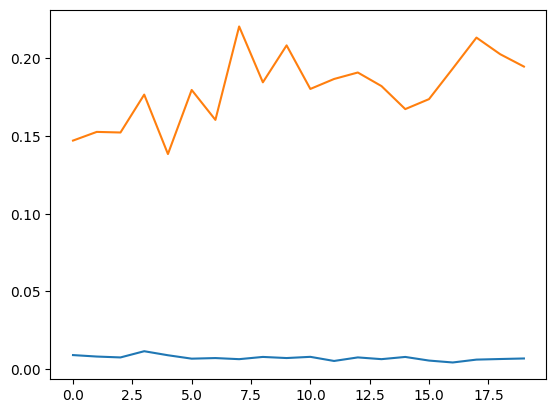

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

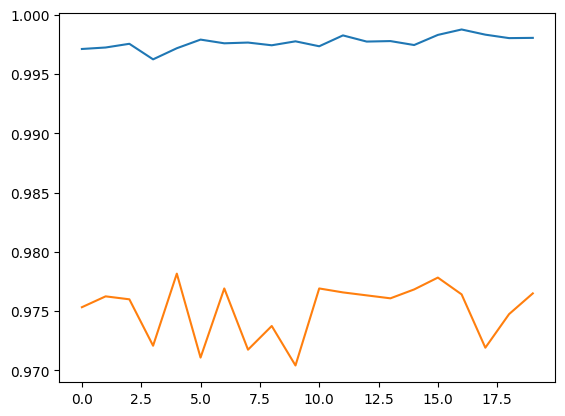

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

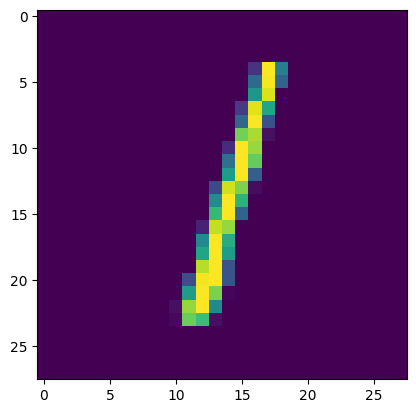

In [38]:
plt.imshow(x_test[2])

In [39]:
model.predict(x_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([1])